<a href="https://colab.research.google.com/github/ozorpak/capstone/blob/main/berttemplate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from tqdm import tqdm

In [2]:
# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
num_classes = 3  # Number of classes in your classification task
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=num_classes)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [33]:
# Define your training and testing datasets (replace with your own data)
train_texts = ["Politics", "Education", "Medicine",
               "Politics", "Education", "Medicine",
               "Politics", "Education", "Medicine",
               "Politics", "Education", "Medicine",
               "Politics", "Education", "Medicine",
               "Politics", "Education", "Medicine",
               "Politics", "Education", "Medicine",
               "Politics", "Education", "Medicine"]

train_labels = [0, 1, 2,0, 1, 2,0, 1, 2,0, 1, 2,0, 1, 2,0, 1, 2,0, 1, 2,0, 1, 2]  # Replace with actual labels

test_texts = ["Politics something", "Education something", "Medicine something"]
test_labels = [0, 1, 2]  # Replace with actual labels

In [34]:
# Tokenize and convert to tensors
train_encodings = tokenizer(train_texts, truncation=True, padding=True, return_tensors='pt')
train_labels = torch.tensor(train_labels)

test_encodings = tokenizer(test_texts, truncation=True, padding=True, return_tensors='pt')
test_labels = torch.tensor(test_labels)

In [35]:
train_encodings[:3]

{'input_ids': tensor([[ 101, 4331,  102],
         [ 101, 2495,  102],
         [ 101, 4200,  102]]),
 'token_type_ids': tensor([[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]),
 'attention_mask': tensor([[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]])}

In [36]:
# Create DataLoader for training and testing datasets
train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], train_labels)
test_dataset = TensorDataset(test_encodings['input_ids'], test_encodings['attention_mask'], test_labels)


In [37]:
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=8, shuffle=False)

In [51]:
for batch in train_dataloader:
  print(batch)

[tensor([[ 101, 2495,  102],
        [ 101, 4200,  102],
        [ 101, 4200,  102],
        [ 101, 4331,  102],
        [ 101, 2495,  102],
        [ 101, 4331,  102],
        [ 101, 4200,  102],
        [ 101, 2495,  102]]), tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]), tensor([1, 2, 2, 0, 1, 0, 2, 1])]
[tensor([[ 101, 4200,  102],
        [ 101, 2495,  102],
        [ 101, 4200,  102],
        [ 101, 4200,  102],
        [ 101, 2495,  102],
        [ 101, 4331,  102],
        [ 101, 4331,  102],
        [ 101, 2495,  102]]), tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]), tensor([2, 1, 2, 2, 1, 0, 0, 1])]
[tensor([[ 101, 2495,  102],
        [ 101, 4200,  102],
        [ 101, 4331,  102],
        [ 101, 4331,  102],
        [ 101, 2495,  102],
        [ 101, 4200,  102],
 

In [53]:
len(train_dataloader)

3

In [38]:
optimizer = AdamW(model.parameters(), lr=1e-5)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [48]:
num_epochs=3
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [49]:
for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch in tqdm(train_dataloader, desc=f'Epoch {epoch + 1}'):
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    average_loss = total_loss / len(train_dataloader)
    print(f'Epoch {epoch + 1}, Average Training Loss: {average_loss}')

Epoch 1: 100%|██████████| 3/3 [00:08<00:00,  2.91s/it]


Epoch 1, Average Training Loss: 1.143617312113444


Epoch 2: 100%|██████████| 3/3 [00:03<00:00,  1.32s/it]


Epoch 2, Average Training Loss: 0.9663295944531759


Epoch 3: 100%|██████████| 3/3 [00:04<00:00,  1.57s/it]

Epoch 3, Average Training Loss: 0.865821381409963


In [23]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model1=Sequential()
model1.add(Dense(5,input_shape=(1,),activation='relu')),
model1.add(Dense(5,input_shape=(1,),activation='relu')),
model1.add(Dense(5,input_shape=(1,),activation='relu')),
model1.add(Dense(5,input_shape=(1,),activation='relu')),
model1.add(Dense(5,input_shape=(1,),activation='relu'))
model1.compile(optimizer='adam',loss='mse')
model1.fit(X,y)
model1.evaluate(X_test,y_test)

In [4]:
from keras.models import Sequential
from keras.layers import Dense


In [9]:
model=Sequential()
model.add(Dense(5,input_shape=(1,),activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='mse')


In [46]:
1e-2

0.01

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model2=Sequential()
model2.add(Dense(5,input_shape=(X.shape[1],)))
model2.add(Dense(5,activation='relu'))
model2.compile(optimizer='adam',loss='mse')

In [24]:

import numpy as np
X=np.random.rand(100,1)
y=2*X+1+np.random.randn(100,1)*0.1
X_test=np.random.rand(20,1)
y_tes=2*X_test+1+np.random.randn(20,1)*0.1


In [17]:
model2.fit(X,y,epochs=3)

Epoch 1/3
4/4 [==============================] - 1s 6ms/step - loss: 3.4597
Epoch 2/3
4/4 [==============================] - 0s 5ms/step - loss: 3.4164
Epoch 3/3
4/4 [==============================] - 0s 4ms/step - loss: 3.3743


In [18]:
model2.evaluate(X_test,y_tes)

1/1 [==============================] - 0s 129ms/step - loss: 3.4572


3.457181453704834

In [7]:
model2.fit(X,y,epochs=3)


Epoch 1/3
4/4 [==============================] - 1s 11ms/step - loss: 5.0032
Epoch 2/3
4/4 [==============================] - 0s 4ms/step - loss: 4.9766
Epoch 3/3
4/4 [==============================] - 0s 4ms/step - loss: 4.9502


In [8]:
X_test=np.array([[0.1],[0.2],[0.3]])
y_pred=model2.predict(X_test)


1/1 [==============================] - 0s 76ms/step


In [9]:
y_pred

array([[-0.00227731, -0.08247089,  0.04530448, -0.0145268 , -0.01622205],
       [-0.01654745, -0.17692979,  0.07861312, -0.04104567, -0.04443606],
       [-0.0308176 , -0.2713887 ,  0.11192177, -0.06756453, -0.07265007]],
      dtype=float32)

In [25]:
# Install required libraries
!pip install pycaret

# Import libraries
import pandas as pd
from pycaret.anomaly import *
from pycaret.datasets import get_data

# Get some sample data
data = get_data('anomaly')
data.head()

# Set up the Anomaly Detection model
ad = setup(data, session_id=123)

# Create the model
model = create_model('iforest')

# Predict on the test data
predictions = predict_model(model, data=data)

# Display the predictions
predictions


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 46.5 MB/s 

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10
0,0.263995,0.764929,0.138424,0.935242,0.605867,0.518790,0.912225,0.608234,0.723782,0.733591
1,0.546092,0.653975,0.065575,0.227772,0.845269,0.837066,0.272379,0.331679,0.429297,0.367422
2,0.336714,0.538842,0.192801,0.553563,0.074515,0.332993,0.365792,0.861309,0.899017,0.088600
3,0.092108,0.995017,0.014465,0.176371,0.241530,0.514724,0.562208,0.158963,0.073715,0.208463
4,0.325261,0.805968,0.957033,0.331665,0.307923,0.355315,0.501899,0.558449,0.885169,0.182754


,Description,Value
0,Session id,123
1,Original data shape,"(1000, 10)"
2,Transformed data shape,"(1000, 10)"
3,Numeric features,10
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Anomaly,Anomaly_Score
0,0.263995,0.764929,0.138424,0.935242,0.605867,0.518790,0.912225,0.608234,0.723782,0.733591,0,-0.035865
1,0.546092,0.653975,0.065575,0.227772,0.845269,0.837066,0.272379,0.331679,0.429297,0.367422,0,-0.084927
2,0.336714,0.538842,0.192801,0.553563,0.074515,0.332993,0.365792,0.861309,0.899017,0.088600,1,0.025356
3,0.092108,0.995017,0.014465,0.176371,0.241530,0.514724,0.562208,0.158963,0.073715,0.208463,1,0.042415
4,0.325261,0.805968,0.957033,0.331665,0.307923,0.355315,0.501899,0.558449,0.885169,0.182754,0,-0.023408
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.305055,0.656837,0.331665,0.822525,0.907127,0.882276,0.855732,0.584786,0.808640,0.242762,0,-0.083981
996,0.812627,0.864258,0.616604,0.167966,0.811223,0.938071,0.418462,0.472306,0.348347,0.671129,0,-0.075839
997,0.250967,0.138627,0.919703,0.461234,0.886555,0.869888,0.800908,0.530324,0.779433,0.234952,0,-0.052903
998,0.502436,0.936820,0.580062,0.540773,0.151995,0.059452,0.225220,0.242755,0.279385,0.538755,0,-0.075104


Epoch 1/10
781/781 [==============================] - 37s 38ms/step - loss: 0.0464
Epoch 2/10
781/781 [==============================] - 18s 23ms/step - loss: 0.0323
Epoch 3/10
781/781 [==============================] - 20s 26ms/step - loss: 0.0325
Epoch 4/10
781/781 [==============================] - 19s 25ms/step - loss: 0.0297
Epoch 5/10
781/781 [==============================] - 19s 24ms/step - loss: 0.0276
Epoch 6/10
781/781 [==============================] - 22s 28ms/step - loss: 0.0277
Epoch 7/10
781/781 [==============================] - 18s 23ms/step - loss: 0.0267
Epoch 8/10
781/781 [==============================] - 19s 24ms/step - loss: 0.0250
Epoch 9/10
781/781 [==============================] - 18s 23ms/step - loss: 0.0258
Epoch 10/10
1/1 [==============================] - 0s 26ms/step


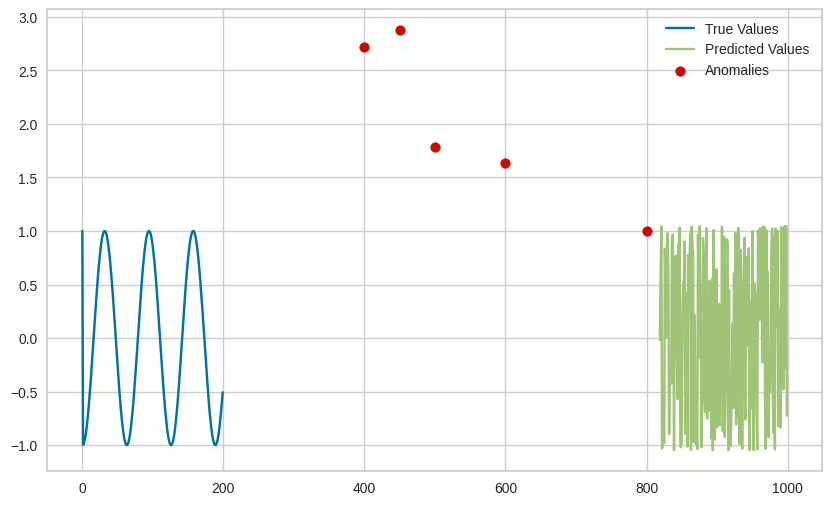

In [26]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Create a time series with normal behavior
time_series = np.sin(np.linspace(0, 100, 1000))

# Add some anomalies
anomaly_idx = [400, 450, 500, 600, 800]
time_series[anomaly_idx] += 2.0

# Create a windowed dataset
def create_dataset(series, window_size):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size))
    dataset = dataset.shuffle(len(series))
    dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
    dataset = dataset.batch(1).prefetch(1)
    return dataset

window_size = 20
batch_size = 1

train_dataset = create_dataset(time_series[:800], window_size)

# Define the LSTM model
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(100, return_sequences=True, input_shape=[None, 1]),
    tf.keras.layers.LSTM(100),
    tf.keras.layers.Dense(1)
])

model.compile(loss='mse', optimizer='adam')

# Train the model
model.fit(train_dataset, epochs=10)

# Create a test dataset
test_dataset = create_dataset(time_series[800:], window_size)

# Predict on the test dataset
predictions = []
for X_batch, y_batch in test_dataset:
    y_pred = model.predict(X_batch)
    predictions.append(y_pred)

# Plot the time series with predicted values
plt.figure(figsize=(10, 6))
plt.plot(time_series[800:], label='True Values')
plt.plot(np.arange(800 + window_size - 1, 1000), np.squeeze(predictions), label='Predicted Values')
plt.scatter(anomaly_idx, time_series[anomaly_idx], color='r', label='Anomalies')
plt.legend()
plt.show()
